In [2]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации

import warnings
warnings.filterwarnings("ignore")

Воспользуемся встроенным датасетом, который содержит информацию об опухолях груди:

In [3]:
from sklearn.datasets import load_breast_cancer # подгружаем датасет
breast_cancer = load_breast_cancer()

Теперь зададим зависимую и независимые переменные:

In [4]:
Y = breast_cancer.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = breast_cancer.data # X - признаки, по которым мы будем предсказывать рак 

Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))
print(precision_score(Y_val,Y_predicted))
print(recall_score(Y_val,Y_predicted))
print(f1_score(Y_val,Y_predicted))

0.9707602339181286
0.981651376146789
0.9727272727272728
0.9771689497716896


## Задание 3B.2.1
Вы создали классификатор, который разделяет экономические и политические новости на два разных Telegram-канала, и хотите проверить его качество. За день вышло 15 политических новостей и 20 экономических.
Ваш алгоритм из 15 политических новостей отметил 9 как экономические, а из 20 экономических — 6 как политические.
Найдите метрику $Accuracy$.
Ответ округлите до сотых. Пример ввода: 5.55.

In [7]:
tp, tn, fp, fn = 6, 14, 9, 6
accuracy = (tp+tn)/(tp+tn+fp+fn)
round(accuracy,2)

0.57

## Задание 3B2.2
Загрузите встроенный в библиотеку `sklearn` датасет про ирисы с помощью функции `load_iris`. Обучите модель логистической регрессии `(random_state=50, размер тестовой выборки 0.3)` и укажите полученное значение метрики $Accuracy$.
Ответ округлите до сотых. Пример ввода: 5.55.

In [8]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

data = load_iris()

In [9]:
X, y = data.data, data.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3,random_state=50)
model = LogisticRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_val)
round(accuracy_score(y_val,y_predicted),2)

0.98

# Классификация. Практика
У вас есть датасет с параметрами мобильных телефонов. Переменная price_range отвечает за то, к какой категории относится телефон: 1 — дорогие, 0 — дешевые.  
Задача состоит в том, чтобы наиболее точно научиться классифицировать телефоны по этим двум категориям на основании других параметров.

In [10]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, precision_score

In [11]:
df = pd.read_csv("./Unit_5_data/train_mobile.csv",delimiter=';')

## Задание 3B.3.1 Отбор признаков
Выберите пять признаков, у которых наибольшая взаимосвязь с целевой переменной (с помощью корреляции).

In [12]:
feat = (df.corr() - np.eye(df.shape[1])).price_range.abs().sort_values(ascending=False)[:5].index.to_list()
feat

['ram', 'battery_power', 'px_width', 'px_height', 'touch_screen']

Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте `0.2`. Параметр `random_state=31`. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории. 

## 3B.3.3 Значение метрики
Введите полученное значение, округлите до четырех знаков после запятой. Целую и десятичную часть разделите точкой. Пример ввода: 5.5555.

In [13]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [14]:
df[feat]

,ram,battery_power,px_width,px_height,touch_screen
0,2549,842,756,20,0
1,2631,1021,1988,905,1
2,2603,563,1716,1263,1
3,2769,615,1786,1216,0
4,1411,1821,1212,1208,1
...,...,...,...,...,...
1995,668,794,1890,1222,1
1996,2032,1965,1965,915,1
1997,3057,1911,1632,868,1
1998,869,1512,670,336,1


In [15]:
X =  df[feat]
y = df.price_range.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=31)
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
ans = precision_score(y_test,y_pred) # ВАЖЕН ПОРЯДОК Y-ков!!!
round(ans,4)

0.9859

Когда мы получаем на выходе модели нули и единицы, мы можем использовать обычные метрики для классификации — $accuracy$, $f1-score$ и другие. Если мы хотим посчитать ошибку для вероятностей, которые возвращает сигмоида, можно воспользоваться $logloss$

$\sum_{i}(-y_i^{true}log y_i^{pred}-(1-y_i^{true})log(1-y_i^{pred}))$ — для случая, когда классы обозначаются как: +1 и 0.  

То же самое для нескольких классов: 

$logloss(y_{true}, y_{pred})=-\frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^{m}y_{true_-ij}*lny_{pred_-ij}$  

$y_{true_-ij}$ — бинарная переменная. 1 — если пример i имеет класс j, иначе равно 0.  
$y_{pred_-ij}$ — вероятность того, что пример i имеет класс j, берётся из модели.

## Задание 3B.5.3
Посчитайте $logloss$ для данных в таблице (без нормализации). Укажите число с точностью до сотых:

||||||
|-|-|-|-|-|
Предсказанное значение|0.2|0.8|1|0.6
Истинное значение|0|0|1|1

In [16]:
y_pred = np.array([0.2,0.8,1,0.6])
y = np.array([0,0,1,1])

In [17]:
(-y*np.log(y_pred) - (1-y)*np.log(1-y_pred))

array([0.22314355, 1.60943791,        nan, 0.51082562])

In [18]:
from sklearn.metrics import log_loss
round(log_loss(y, y_pred,normalize=False),2)

2.34

## Задание 3B.5.4
Посчитайте $logloss$ для данных в таблице. Необходимо найти среднюю ошибку. Классификация на три класса:

|||||
|-|-|-|-|
||0.2|0|0.1|
|Предсказанное значение|0.3|0|0|
||0.5|1|0.9|
||0|0|1|
|Истинное значение|0|0|0|
||1|1|0|
	
	

In [19]:
y_pred = np.array([[0.2,0,0.1],
          [0.3,0,0],
          [0.5,1,0.9]])

y = np.array([[0,0,1],
         [0,0,0],
         [1,1,0]])

In [20]:
round(log_loss(y, y_pred),2)

1.18

In [21]:
y_pred = np.array([[0.2, 0, 0.1],[0.3, 0, 0], [0.5, 1, 0.9]])
y_true = np.array([[0, 0, 1],[0, 0, 1], [1, 0, 0]])

def logloss(true, pred):
    result = 0
    n,m = true.shape
    for i in range(n):
        for j in range(m):
            element = true[i][j]*np.log(pred[i][j])
            result += 0 if np.isnan(element) or np.isinf(element) else -element/n              
    return result
ans = logloss(y_true,y_pred)
ans

0.9985774245179969

 # Логистическая регрессия. Практика

В качестве экспериментальных данных возьмем датасет о доходах граждан в различных странах `Adult Income` (файл также можно скачать из [открытого источника](https://archive.ics.uci.edu/ml/datasets/Adult). Далее сделаем необходимую предобработку:

In [22]:
# adult = pd.read_csv('./Unit_5_data/adult.data',
#                     names=['age', 'workclass', 'fnlwgt', 'education',
#                            'education-num', 'marital-status', 'occupation',
#                            'relationship', 'race', 'sex', 'capital-gain',
#                            'capital-loss', 'hours-per-week', 'native-country', 'salary'])

In [23]:
def prepare_adult_data():
    adult = pd.read_csv('./Unit_5_data/adult.data',
                        names=['age', 'workclass', 'fnlwgt', 'education',
                               'education-num', 'marital-status', 'occupation',
                               'relationship', 'race', 'sex', 'capital-gain',
                               'capital-loss', 'hours-per-week', 'native-country', 'salary'])
    
    # Избавиться от лишних признаков
    adult.drop(['native-country'], axis=1, inplace=True)
    # Сконвертировать целевой столбец в бинарные значения
    adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
    # Сделать one-hot encoding для некоторых признаков
    adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])
    
    # Нормализовать нуждающиеся в этом признаки
    a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
    norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
    adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features
    
    # Разбить таблицу данных на матрицы X и y
    X = adult[list(set(adult.columns) - set(['salary']))].values
    y = adult['salary'].values

    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [24]:
X, y = prepare_adult_data()

## Задание 3B.6.1
Постройте модель логистической регрессии при помощи sklearn. Используйте параметры по умолчанию, обучите на всей выборке и посчитайте $F1-score$.

Ответ округлите до сотых. Пример ввода: 5.55.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [26]:
lr =  LogisticRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

In [27]:
ans = f1_score(y,y_pred)
round(ans,2)

0.66

## Задание 3B.6.2
Посчитайте **confusion matrix** для классификатора из **задачи 3.6.1.** Для получения матрицы можно воспользоваться методом `sklearn.metrics.confusion_matrix(y_true, y_pred)`, либо посчитать каждый элемент вручную.

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y, y_pred)

array([[23028,  1692],
       [ 3128,  4713]], dtype=int64)

## Задание 3B.6.3
Постройте ***ROC-кривую*** и посчитайте $ROC-AUC$ для классификатора из **задачи 3.6.1.**  
Ответ округлите до сотых. Пример ввода: 5.55

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

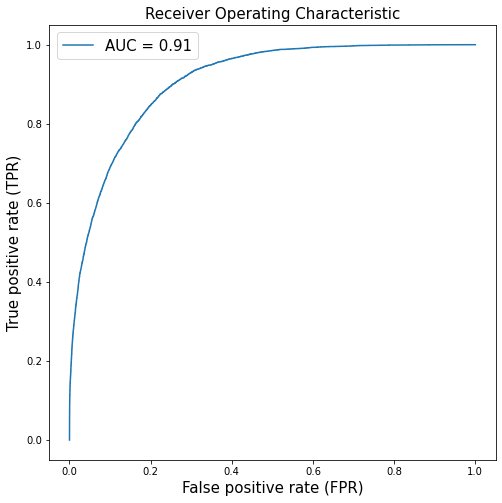

In [68]:
lr =  LogisticRegression()
lr.fit(X,y)
y_pred_proba = lr.predict_proba(X)

calc_and_plot_roc(y, y_pred_proba[:,1])

## Задание 3B.6.4
Постройте модель логистической регрессии при помощи sklearn без регуляризации. Чему равен $F1 score$ ?

Ответ округлите до сотых. Пример ввода: 5.55.

In [69]:
lr =  LogisticRegression(penalty='none')
lr.fit(X,y)
y_pred = lr.predict(X)


In [70]:
ans = f1_score(y,y_pred)
round(ans,2)

0.66

## Задание 3B.6.5
Переберите коэффициенты $l2$-регуляризации от $0.1$  до $1$ с шагом $0.1$ и определите, на каком из них модель логистической регрессии из `sklearn` даёт наибольший $F1 score$ .

Ответ округлите до сотых. Пример ввода: 5.55.

In [71]:
scores = pd.Series()
for C in np.arange(0.1,1.1,0.1):
    lr =  LogisticRegression(C=C)
    lr.fit(X,y)
    y_pred = lr.predict(X)
    f1_score(y,y_pred)
    scores = scores.append(pd.Series([f1_score(y,y_pred)], index = [C]))
    
ans = scores.max()
round(ans,2)

0.66

## Задание 3B.6.6
Замените в столбце `native-country` страны, у которых меньше ста записей, на `other`, поменяйте этот столбец на **dummy-переменные**, обучите классификатор на всей выборке и посчитайте  $F1 score$ .

Ответ округлите до сотых. Пример ввода: 5.55.

In [67]:
def prepare_adult_data_mine():
    adult = pd.read_csv('./Unit_5_data/adult.data',
                        names=['age', 'workclass', 'fnlwgt', 'education',
                               'education-num', 'marital-status', 'occupation',
                               'relationship', 'race', 'sex', 'capital-gain',
                               'capital-loss', 'hours-per-week', 'native-country', 'salary'])
    
    # Обработать native-country
    mask = adult['native-country'].value_counts() < 100
    countries_to_unify = adult['native-country'].value_counts().index[mask]
    adult['native-country'] = adult['native-country'].apply(lambda x:'other' if x in countries_to_unify else x )
    # Сконвертировать целевой столбец в бинарные значения
    adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
    # Сделать one-hot encoding для некоторых признаков
    adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                                           'race', 'sex','native-country'])
    
    # Нормализовать нуждающиеся в этом признаки
    a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
    norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
    adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features
    
    # Разбить таблицу данных на матрицы X и y
    X = adult[list(set(adult.columns) - set(['salary']))].values
    y = adult['salary'].values

    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [72]:
X, y = prepare_adult_data_mine()

lr =  LogisticRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

ans = f1_score(y,y_pred)
round(ans,2)

0.66

# ================ПОДВАЛ==================

In [32]:
adult = pd.read_csv('./Unit_5_data/adult.data',
                        names=['age', 'workclass', 'fnlwgt', 'education',
                               'education-num', 'marital-status', 'occupation',
                               'relationship', 'race', 'sex', 'capital-gain',
                               'capital-loss', 'hours-per-week', 'native-country', 'salary'])

In [60]:
mask = adult['native-country'].value_counts() < 100
countries_to_unify = adult['native-country'].value_counts().index[mask]
adult['native-country'] = adult['native-country'].apply(lambda x:'other' if x in countries_to_unify else x )
